In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_MPI_strong = pd.read_csv('scalability/MPI_strong_scalability.csv')
df_OMP_strong = pd.read_csv('scalability/OMP_strong_scalability.csv')
df_MPI_weak = pd.read_csv('scalability/MPI_weak.csv')
df_OMP_weak = pd.read_csv('scalability/OpenMP_weak.csv')

In [8]:
def get_mpi_time(df, np):
    return df[df['np'] == np]['time'].values[0]

def get_omp_time(df, n_threads):
    return df[df['n_threads'] == n_threads]['time'].values[0]

def amhdal_speedup(N, P):
    return 1 / ((1 - P) + (P / N))

def amhdal_curve(N, P, T2):
    T1 = T2 * ((1 - P) + (P / 2))
    return T1 / amhdal_speedup(N, P)

def estimate_P(T2, T4):
    return 4 * (T2 - T4) / (3*T2 - 2*T4)

In [9]:
P_MPI_strong = estimate_P(get_mpi_time(df_MPI_strong, 2), get_mpi_time(df_MPI_strong, 4))
P_OMP_strong = estimate_P(get_omp_time(df_OMP_strong, 2), get_omp_time(df_OMP_strong, 4))
print(f'P_MPI_strong = {P_MPI_strong}')
print(f'P_OMP_strong = {P_OMP_strong}')

P_MPI_strong = 0.9255647362865357
P_OMP_strong = 0.9253822961237789


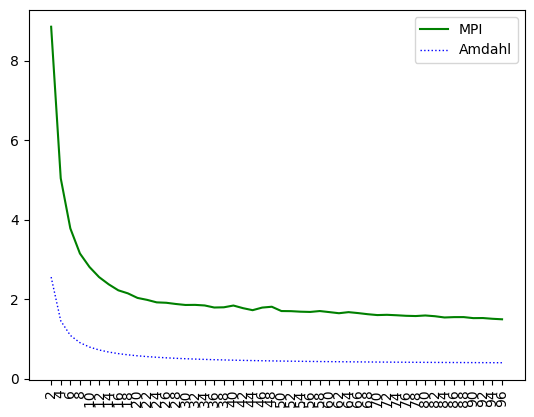

In [10]:
plt.figure()
plt.plot(df_MPI_strong['np'], df_MPI_strong['time'], color='green', label='MPI')
plt.plot(df_MPI_strong['np'], [amhdal_curve(N, P_MPI_strong, get_mpi_time(df_MPI_strong, 2)) for N in df_MPI_strong['np']], color='blue', linestyle=':', linewidth=1, label='Amdahl')
plt.xticks(df_MPI_strong['np'], rotation=90)
plt.legend()


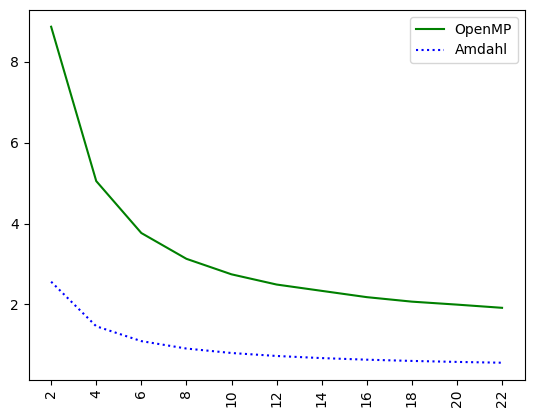

In [11]:
plt.figure()
plt.plot(df_OMP_strong['n_threads'], df_OMP_strong['time'], color='green', label='OpenMP')
plt.xticks(df_OMP_strong['n_threads'], rotation=90)
plt.plot(df_OMP_strong['n_threads'], [amhdal_curve(N, P_OMP_strong, get_omp_time(df_OMP_strong, 2)) for N in df_OMP_strong['n_threads']], color='blue', linestyle=':', label='Amdahl')
plt.legend()

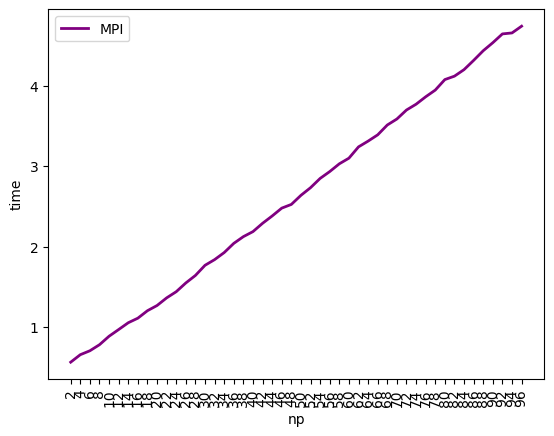

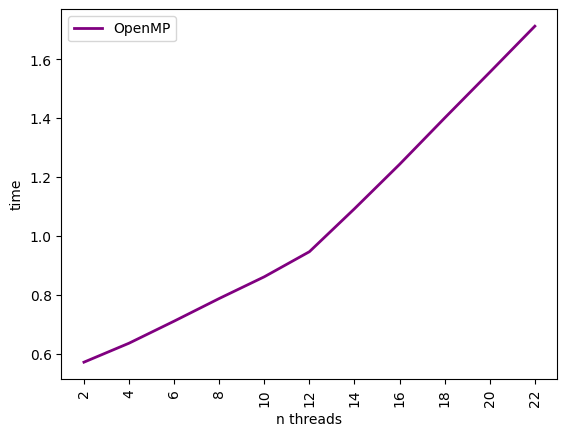

In [12]:
plt.plot(df_MPI_weak['np'], df_MPI_weak['time'], color='purple', linewidth=2, label='MPI')
plt.xlabel('np')
plt.xticks(df_MPI_weak['np'], rotation=90)
plt.ylabel('time')
plt.legend()
plt.show()


plt.plot(df_OMP_weak['n_threads'], df_OMP_weak['time'], label='OpenMP',  color='purple', linewidth=2)
plt.xlabel('n threads')
plt.xticks(df_OMP_weak['n_threads'], rotation=90)
plt.ylabel('time')
plt.legend()
plt.show()